In [14]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [15]:
# Importing Datasets
path=r'C:\Users\manis\Documents\Instacart Basket Analysis'

In [16]:
# Importing Dataset
ords_prods_merge=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', '4.8_ords_prods_merge.pkl'))

In [4]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,ordered_today,product_id,add_to_cart_order,...,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,spending,spending_flag,Order_frequency_median,order_frequency_flag
0,2539329,1,prior,1,2,8,NaN,True,196,1,...,77.0,7.0,9.0,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2539329,1,prior,1,2,8,NaN,True,14084,2,...,91.0,16.0,12.5,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,2539329,1,prior,1,2,8,NaN,True,12427,3,...,23.0,19.0,4.4,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2539329,1,prior,1,2,8,NaN,True,26088,4,...,23.0,19.0,4.7,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,2539329,1,prior,1,2,8,NaN,True,26405,5,...,54.0,17.0,1.0,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


<AxesSubplot:>

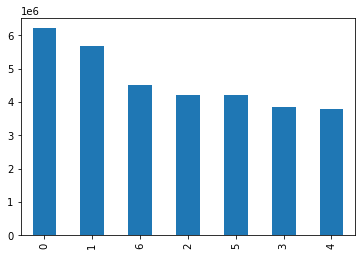

In [6]:
# Creating bar chart for “orders_day_of_the_week” coloumn
ords_prods_merge['order_dow'].value_counts().plot.bar()

<AxesSubplot:>

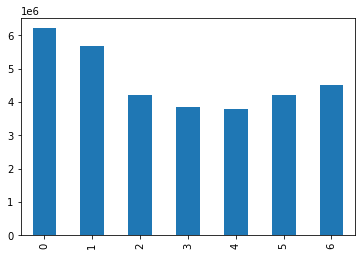

In [7]:
#using sort_index() function to arrange the bar graph in order
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

In [8]:
# using sort_index() function while printing the frequencies
ords_prods_merge['order_dow'].value_counts(dropna=False).sort_index()

0    6209808
1    5665951
2    4217868
3    3844175
4    3787263
5    4209603
6    4500391
Name: order_dow, dtype: int64

<AxesSubplot:>

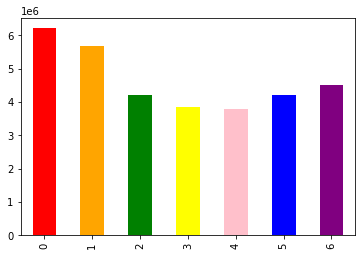

In [9]:
# Adding colors to the bars
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar(color=['red','orange','green','yellow','pink','blue','purple'])

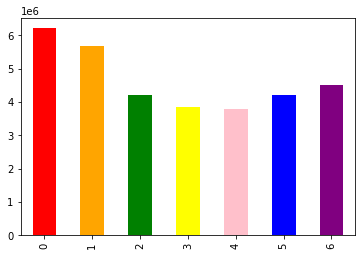

In [10]:
#Creating object "bar" to save bar chart
bar=ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar(color=['red','orange','green','yellow','pink','blue','purple'])

In [11]:
#Exporting Chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

##### Creating Line Chart

In [29]:
# Creating Subset, Using Data Sampling Method
# Creating a list  holding True/False values to the test np.random.rand() <=0.7
#Explanation : Creating the list of random floating numbers between 0 and 1 and comparing to the value of 0.7, creating 70/30 split in the data as per the result of comparision
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [30]:
# Checking the values in list dev
dev

array([False,  True, False, ...,  True,  True,  True])

In [31]:
# Checking what values np.random.rand() function generates
np.random.rand(10)

array([0.79555729, 0.6652899 , 0.04000166, 0.90958442, 0.0493868 ,
       0.6829014 , 0.09612088, 0.92855965, 0.51356997, 0.69561069])

In [32]:
#checking the length of dataframe
len(ords_prods_merge)

32435059

In [34]:
# Splitting Dataframe ords_prods_merge into two samples
#Storing 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [35]:
#Storing 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [36]:
len(ords_prods_merge)

32435059

In [37]:
len(big)+len(small)

32435059

In [38]:
# Creating new dataframe which contains data only from two columns
df_2 = small[['order_dow','prices']]

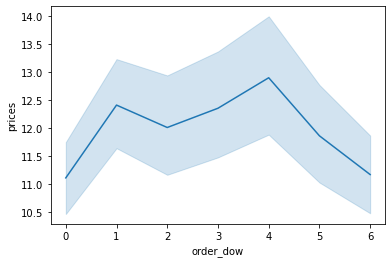

In [39]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

##### Creating Histogram

Before creating Histogram on column 'prices', Lets conduct some data cleaning on column 'Prices'

In [43]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [44]:
ords_prods_merge['prices'].median()

7.4

In [45]:
ords_prods_merge['prices'].mean()

11.980225638676366

In [46]:
ords_prods_merge['prices'].max()

99999.0

Max value is not at all relatable with mean & median values, further analysis is required to find the data outliers.To find data outliers, we will construct ScatterPlot here


<AxesSubplot:xlabel='prices', ylabel='prices'>

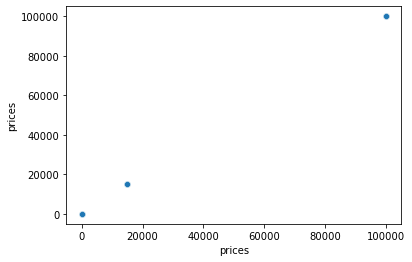

In [47]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

We can see outliers in the scatterchart, to find all the outlier values, we need to determine whether there are any values above a certain threshold in data, for instance, anything above the “normal” price of a supermarket item , say 100

In [48]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,ordered_today,product_id,add_to_cart_order,...,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,spending,spending_flag,Order_frequency_median,order_frequency_flag
1576,912404,17,prior,12,2,14,5.0,False,21553,5,...,108.0,16.0,14900.0,both,40,Regular customer,108.648299,High spender,5.0,Frequent_customer
1638,603376,17,prior,22,6,16,4.0,False,21553,3,...,108.0,16.0,14900.0,both,40,Regular customer,108.648299,High spender,5.0,Frequent_customer
16534,3264360,135,prior,2,2,21,13.0,False,21553,6,...,108.0,16.0,14900.0,both,4,New customer,1154.792308,High spender,12.0,Regular customer
16540,892534,135,prior,3,0,8,12.0,False,21553,3,...,108.0,16.0,14900.0,both,4,New customer,1154.792308,High spender,12.0,Regular customer
53712,229704,342,prior,8,1,19,30.0,False,21553,9,...,108.0,16.0,14900.0,both,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32350634,3172853,205650,prior,18,1,9,7.0,False,21553,17,...,108.0,16.0,14900.0,both,25,Regular customer,351.141618,High spender,6.0,Frequent_customer
32377867,2504315,205818,prior,3,5,15,3.0,False,21553,13,...,108.0,16.0,14900.0,both,25,Regular customer,170.073770,High spender,12.5,Regular customer
32377877,1108388,205818,prior,5,4,5,1.0,False,21553,5,...,108.0,16.0,14900.0,both,25,Regular customer,170.073770,High spender,12.5,Regular customer
32410707,1916142,206049,prior,1,2,17,NaN,True,21553,2,...,108.0,16.0,14900.0,both,5,New customer,938.031250,High spender,7.0,Frequent_customer


Lets mark all these outlier values as missing


In [49]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [50]:
ords_prods_merge['prices'].max()

25.0

We have replaced all the outlier values with missing values ,now max value of 25 seems much realistic for grocery item.
Lets construct the histogram again

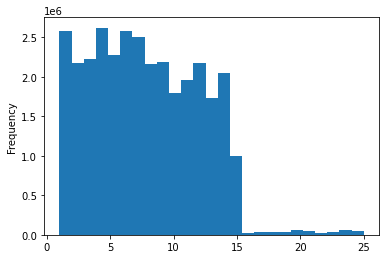

In [51]:
hist=ords_prods_merge['prices'].plot.hist(bins = 25)

In [54]:
# Importing dataset created in Task 4.9 Part 1
df=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', '4.9_Part1_ords_prods_cust.pkl'))

In [55]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,ordered_today,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,no_of_dependants,family_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


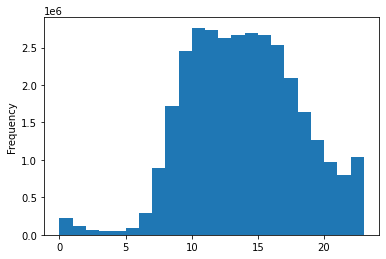

In [56]:
# Creating a histogram of the “order_hour_of_day” column.
hist1=ords_prods_merge['order_hour_of_day'].plot.hist(bins = 23)

##### This histogram demostrates that most of orders are made during the middle of the day

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30658154 entries, 0 to 30658153
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   order_dow               int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   ordered_today           bool    
 7   product_id              int64   
 8   add_to_cart_order       int8    
 9   reordered               int8    
 10  product_name            object  
 11  aisle_id                float16 
 12  department_id           float64 
 13  prices                  float64 
 14  max_order               int8    
 15  loyalty_flag            category
 16  spending                float16 
 17  spending_flag           category
 18  Order_frequency_median  float16 
 19  order_frequency_flag    category
 20  first_name              object  
 21  last_n

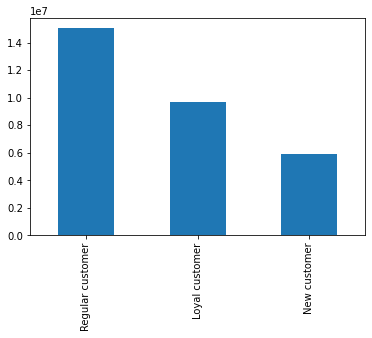

In [6]:
# Creating bar chart for “loyalty_flag” coloumn
bar_2=df['loyalty_flag'].value_counts().plot.bar()

In [10]:
df['prices'].max()

99999.0

In [11]:
df.loc[df['prices'] >100, 'prices'] = np.nan

In [12]:
df['prices'].max()

25.0

In [18]:
#Creating Line Chart : Prices & order_hour_of_day, Checking whether there’s a difference in expenditure depending on the hour of the day.
# First I will create new dataset with only two columns , for faster execution of the code
df_3 = df[['prices', 'order_hour_of_day']]

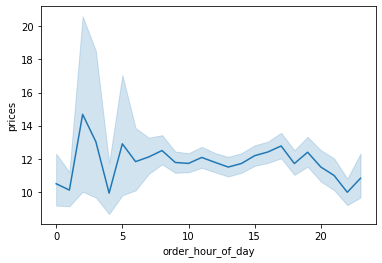

In [19]:
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [21]:
# Creating Line Chart : age & no_of_dependants : Finding the connection between age and family status
df_4= df[['age', 'no_of_dependants']]

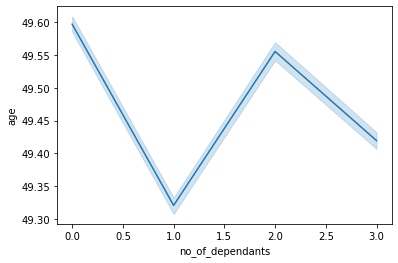

In [24]:
line_3=sns.lineplot(data = df_4, x = 'no_of_dependants', y = 'age')

##### The line chart above shows the average number of dependants for age ranging from 49.30 to 49.60, on an average this age group has 2 dependants

In [25]:
df_5=df[['age','income']]

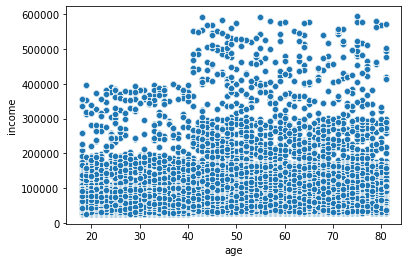

In [26]:
scatter = sns.scatterplot(data = df, x = 'age', y = 'income')

##### This scatterchart shows that there is a positive relationship between income and age, income increases with age

##### Exporting Visualizations

In [40]:
# Exporting Line Chart, Order_dow, prices
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow_prices.png'))

In [52]:
#Exporting histogram, prices
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [57]:
#Exporting histogram, order_hour_of_day
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [58]:
#Exporting Bar Chart, loyalty flag
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [59]:
# Exporting Line Chart, Order_hour_of_day, prices
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_of_day_prices.png'))

In [60]:
# Exporting Line Chart,no_of_dependants,age
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependants_age'))

In [61]:
# Exporting Scatter Chart,age,income
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income'))